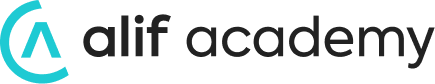

# Модуль 1.1: Python для аналитиков

### Домашнее задание

P.S первую часть домашнего задания вы можете найти в файле с занятия

**Дедлайн**: 13 января 23:59

### **Задание №2**

- Загрузите [датасет](https://disk.yandex.ru/d/20P4PUpwkigr2g) transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
- Сколько в датасете пропущенных значений?
- Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
- Сколько транзакций завершились ошибкой?
- Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
- Коллега прислал Вам обновленные [данные](https://yadi.sk/d/NtNP5zY0qU4ZAw). Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
- Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
- Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


### Описание данных

Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)

name – имя пользователя

transaction – статус транзакции

minute* – сколько минут прошло с начала дня

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Загрузите датасет transaction_data.csv. 
df = pd.read_csv("transaction_data.csv")
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


> **Проверьте размер таблицы**

In [23]:
print("Размер таблицы:",df.shape,'\n')

Размер таблицы: (5315, 3) 



> **Проверьте типы переменных, число пропущенных значений**

In [3]:
# Пропущенных значений нет, но date необходимо преобразовать в datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


> **Проверьте писательную статистику.**

In [27]:
df.describe()

,date
count,5315
mean,2020-03-02 00:43:56.628974592
min,2020-03-02 00:00:00
25%,2020-03-02 00:21:50.500000
50%,2020-03-02 00:43:26
75%,2020-03-02 01:06:22.500000
max,2020-03-02 01:29:05


> **Сколько в датасете пропущенных значений?**

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


> **Какие значения находятся в колонке transaction?**  
> **Сколько наблюдений относятся к тому или иному уровню?**  
> **Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.**

In [40]:
# unique()  возвращает список уникальных значений
print('Уникальные значения в transaction:', df.transaction.unique(),'\n')
transactions = df.transaction.value_counts()
transactions

Уникальные значения в transaction: ['cancelled' 'successfull' 'error'] 



transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

<AxesSubplot:xlabel='transaction'>

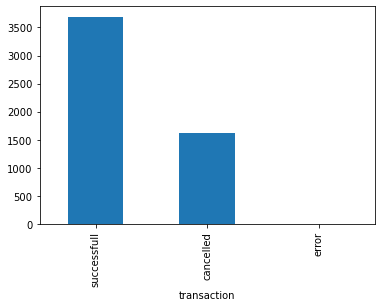

In [60]:
transactions.plot(kind='bar')

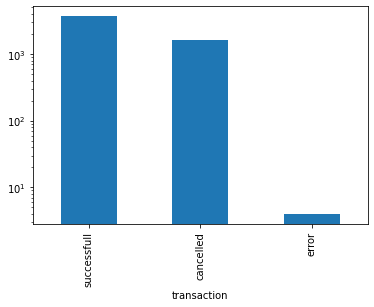

In [59]:
#  logy - логарифмическое масштабирование
transactions.plot(kind='bar',logy=True);

> **Сколько транзакций завершились ошибкой?**

In [69]:
# Сколько транзакций завершились ошибкой?
transactions['error']

4

> **Сколько успешных транзакций осуществил каждый из пользователей?**

In [68]:
# берём только успешные транзакции, объединяем по пользователю и считаем тр. по времени
successfull_transactions = df.query("transaction == 'successfull'")\
                             .groupby('name')\
                             .agg({'date': 'count'})
successfull_transactions.reset_index()

> **Постройте гистограмму распределения числа успешных транзакций.**

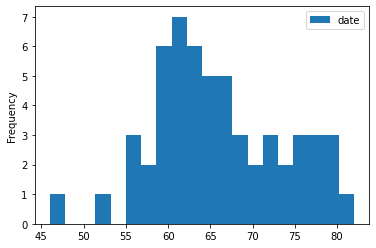

In [84]:
successfull_transactions.plot.hist(bins=20);

> **Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.**

In [4]:
df_upd = pd.read_csv("transaction_data_updated.csv")
df_upd.info()
df_upd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
 3   minute       5315 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 166.2+ KB


,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [5]:
df_upd.date = pd.to_datetime(df_upd.date)
# df_upd.info()
df_upd['true_minute'] = df_upd.date.dt.minute

In [6]:
print(df_upd[~df_upd['minute']==df_upd['true_minute']])

Empty DataFrame
Columns: [date, name, transaction, minute, true_minute]
Index: []


In [14]:
user_vs_minute_pivot = df_upd.pivot_table(index='minute', 
                                          columns='name',
                                          values='date',
                                          aggfunc='count', 
                                          fill_value=0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


In [ ]:
# Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.
# Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


**Важно:** ответ на каждый из вопросов надо предоставить в виде кода и краткого комментария к ответу

### **Задание №3**

Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

InvoiceNo — номер транзакции

StockCode — код товара

Description — описание товара

Quantity — количество единиц товара, добавленных в заказ

InvoiceDate — дата транзакции 

UnitPrice — цена за единицу товара

CustomerID — id клиента

Country — страна, где проживает клиент

Данные можно скачать [отсюда](https://yadi.sk/d/jjaJNk2w3C9AhA).

В данной задаче ссылка для считывания данных лежит в переменной path_to_file.

Импортируйте пандас и прочитайте данные с кодировкой ISO-8859-1. Запишите полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns.


**Вопросы:**
- Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail и скажите сколько дупликатов было в таблице?.
- Данные содержат в себе записи как и об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled). Сколько всего заказов отменили пользователи?
- Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.
- Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id). (Отфильтрованные данные записаны в retail. Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.)
- Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany. (Датафрейм записан в retail, нужные id пользователей – в germany_top.)
- Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.
- Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.(Отфильтрованные данные записаны в retail.)
- Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)

In [21]:
path_to_file = "5_data.csv.zip"
retail = pd.read_csv(path_to_file, compression="zip", encoding="ISO-8859-1")
retail_columns = retail.columns

In [8]:
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

> **Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество.**

In [22]:
duplicates = retail.duplicated()
retail[duplicates].shape[0]

5268

> **Если они есть, то удалите их из retail и скажите сколько дупликатов было в таблице?.**

In [23]:
retail.drop_duplicates(inplace=True)
print("После удаления дупликатов осталось записей:",retail.shape[0])

После удаления дупликатов осталось записей: 536641


> **Данные содержат в себе записи как и об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled). Сколько всего заказов отменили пользователи?** 

In [85]:
print("Количество отменённых заказов:",retail[retail.InvoiceNo.str.match("C")].shape[0])
retail = retail[~retail.InvoiceNo.str.match("C")]

Количество отменённых заказов: 9251


> **Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.**

In [71]:
retial = retail.query("Quantity > 0")
retial.shape[0]

526054

> **Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id). (Отфильтрованные данные записаны в retail. Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.)**

In [40]:
temp = retail\
        .query("Country=='Germany'")\
        .groupby("CustomerID", as_index=False)\
        .agg({'InvoiceNo':'count'})
quantile_80 = temp.InvoiceNo.quantile(0.8)
germany_top = temp[temp.InvoiceNo > quantile_80].CustomerID
germany_top

3     12471.0
4     12472.0
5     12473.0
6     12474.0
8     12476.0
9     12477.0
12    12481.0
20    12517.0
37    12569.0
53    12621.0
57    12626.0
58    12627.0
70    12662.0
72    12668.0
78    12705.0
79    12708.0
80    12709.0
84    12720.0
91    13815.0
Name: CustomerID, dtype: float64

> **Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany. (Датафрейм записан в retail, нужные id пользователей – в germany_top.)**

In [53]:
top_retail_germany = retail[retail.\
                            CustomerID.\
                            isin(germany_top.values)]
top_retail_germany.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany


> **Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.**


In [64]:
popular_code = top_retail_germany.\
                    groupby('StockCode',as_index=False).\
                    agg({"Description": "count"}).\
                    sort_values('Description')
popular_code = popular_code.StockCode.iloc[-2]

retail.query("StockCode==@popular_code").Description.iloc[0]

'ROUND SNACK BOXES SET OF4 WOODLAND '

> **Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.(Отфильтрованные данные записаны в retail.)**

In [65]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


> **Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)**

In [95]:
temp = retail.\
        groupby("InvoiceNo", as_index=False).\
        agg({'Revenue': 'sum'}).\
        sort_values("Revenue", ascending=False).\
        head(5)
for el in temp.InvoiceNo:
    print(el, end=', ')

581483, 541431, 574941, 576365, 556444, 